<h1>Signals and Sampling</h1>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import neurokit2 as nk
from scipy.signal import square, sawtooth

## Revisit Signal

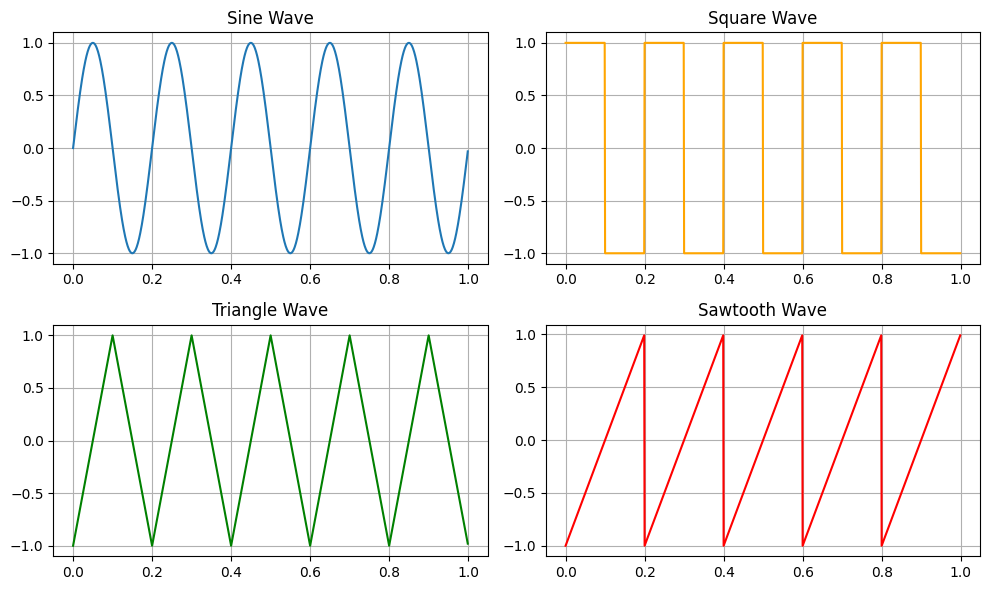

In [3]:
# Time vector
t = np.linspace(0, 1, 1000, endpoint=False)

# Generate signals
sine_wave = np.sin(2 * np.pi * 5 * t)  # Sine wave with frequency 5 Hz
square_wave = square(2 * np.pi * 5 * t)  # Square wave with frequency 5 Hz
triangle_wave = sawtooth(2 * np.pi * 5 * t, 0.5)  # Triangle wave with frequency 5 Hz
sawtooth_wave = sawtooth(2 * np.pi * 5 * t)  # Sawtooth wave with frequency 5 Hz

# Plot signals
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Sine wave
axs[0, 0].plot(t, sine_wave, label='Sine Wave')
axs[0, 0].set_title("Sine Wave")
axs[0, 0].grid(True)

# Square wave
axs[0, 1].plot(t, square_wave, label='Square Wave', color='orange')
axs[0, 1].set_title("Square Wave")
axs[0, 1].grid(True)

# Triangle wave
axs[1, 0].plot(t, triangle_wave, label='Triangle Wave', color='green')
axs[1, 0].set_title("Triangle Wave")
axs[1, 0].grid(True)

# Sawtooth wave
axs[1, 1].plot(t, sawtooth_wave, label='Sawtooth Wave', color='red')
axs[1, 1].set_title("Sawtooth Wave")
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

<h1>REAL-LIFE SIGNAL</h1>

## Sinyal ECG (Electrocardiography)

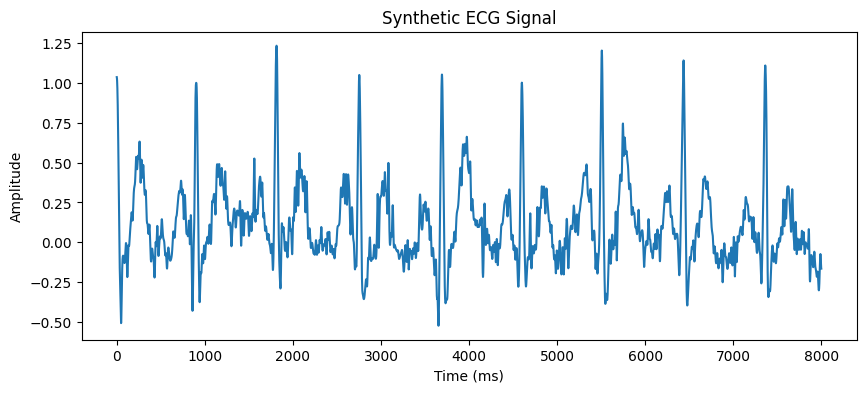

In [4]:
# Generate a synthetic ECG signal
ecg_signal = nk.ecg_simulate(duration=8, sampling_rate=1000, heart_rate=65, noise=0.2, random_state=240925)

# Plot the ECG signal
plt.figure(figsize=(10, 4))
plt.plot(ecg_signal, label='Synthetic ECG Signal')
plt.title("Synthetic ECG Signal")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.show()

## Sinyal Respirasi (Respiration)

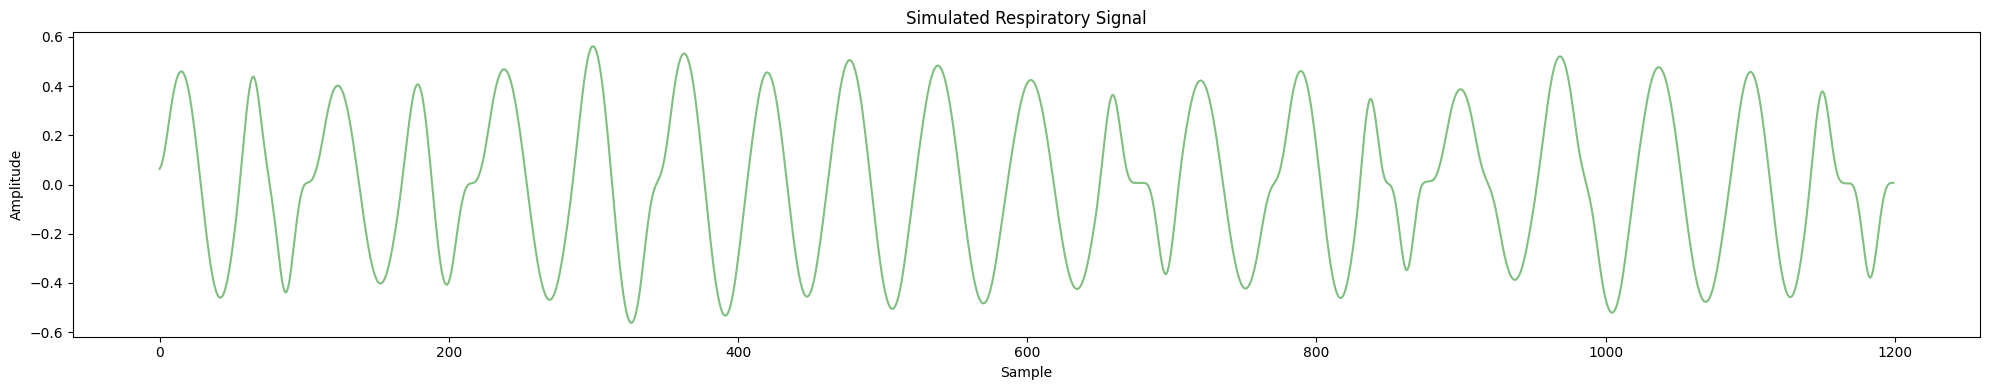

In [4]:
resp_signal = nk.rsp_simulate(duration=60, sampling_rate=20, respiratory_rate=20, noise=0.1, random_state=2025)

# Menampilkan sinyal pernapasan
plt.figure(figsize=(20, 4))
plt.plot(resp_signal, color="green", alpha=0.5)
plt.title("Simulated Respiratory Signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

## Sinyal EMG (Electromyogram)

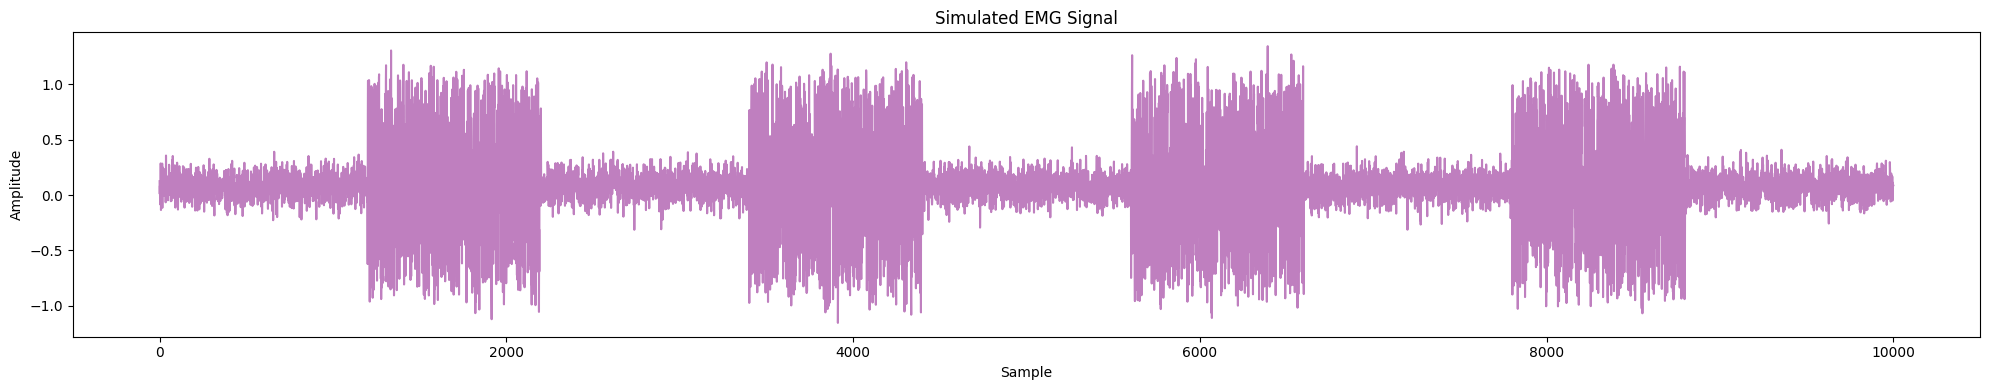

In [5]:
emg_singal = nk.emg_simulate(duration=10, sampling_rate=1000, noise=0.1, burst_number=4 ,random_state=2025)

# Menampilkan plot sinyal EMG
plt.figure(figsize=(20, 4))
plt.plot(emg_singal, color="purple", alpha=0.5)
plt.title("Simulated EMG Signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

<h1>Sinyal Lingkungan (Seismic / Gempa Bumi)</h1>

<Figure size 2000x400 with 0 Axes>

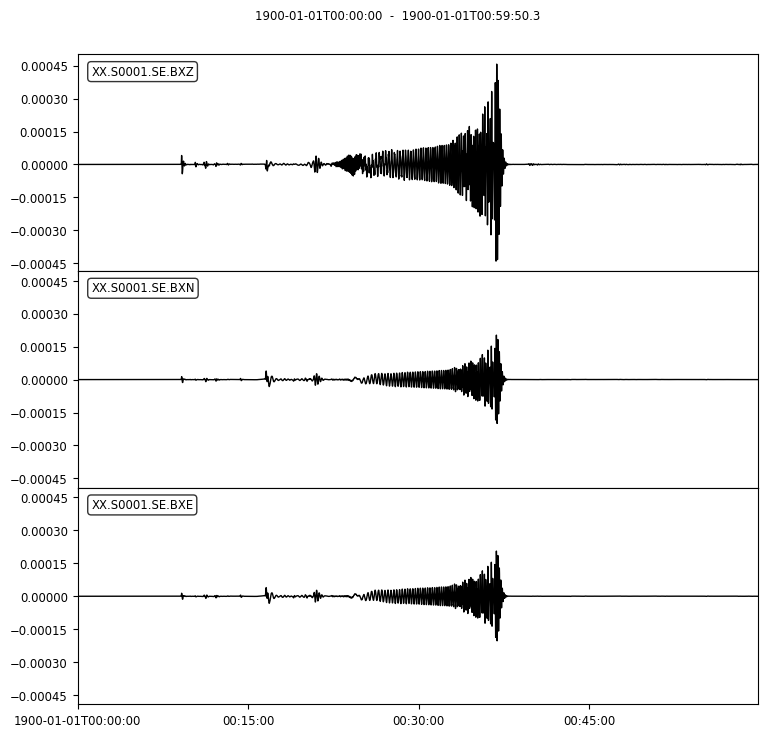

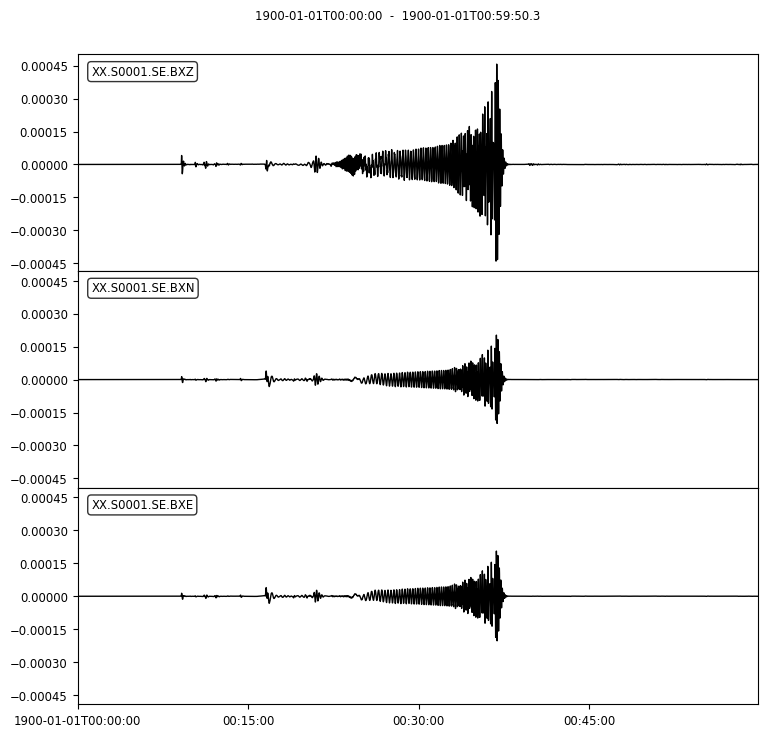

In [6]:
from obspy.clients.syngine import Client
from obspy.core import UTCDateTime

client = Client()
origin_time = UTCDateTime("2023-10-01T00:00:00")
# seismogram = client.get_waveforms(model="ak135f_2s", sourcelatitude=-7.8007839033133575, sourcelongitude=110.37098235071159, sourcedepthinmeters=10000, receiverlatitude=35.6895, receiverlongitude=139.6917, components="ZNE", units="displacement") # Jogjakarta

seismogram = client.get_waveforms(model="ak135f_2s", sourcelatitude=-5.440599180710982, sourcelongitude=105.27711959083427, sourcedepthinmeters=10000, receiverlatitude=35.6895, receiverlongitude=139.6917, components="ZNE", units="displacement") # Lampung

# Menampilkan plot sinyal seismogram
plt.figure(figsize=(20, 4))
seismogram.plot()

## Sinyal Perubahan Suhu

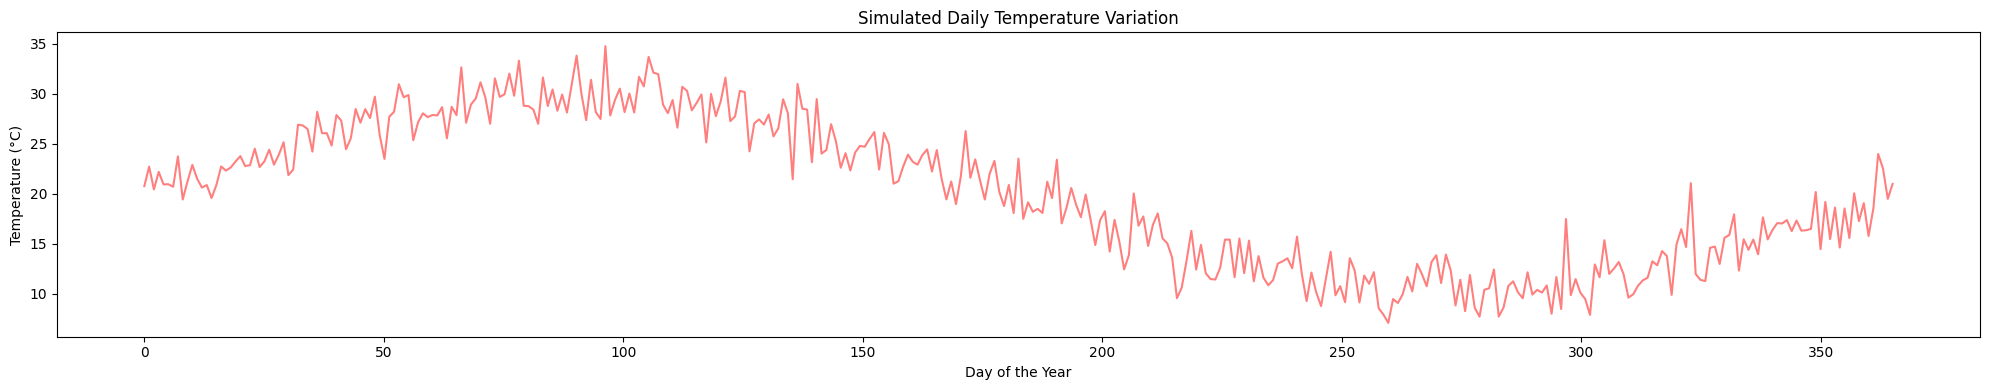

In [7]:
t = np.linspace(0, 365, 365) # Data selama 1 tahun

# Mensimulasikan variasi suhu harian dengan noise 
temperature = 20 + 10 * np.sin(2 * np.pi * t / 365) + 2 * np.random.normal(size=t.shape)

# Menvisualisasi data suhu
plt.figure(figsize=(20, 4))
plt.plot(t, temperature, color="red", alpha=0.5)
plt.title("Simulated Daily Temperature Variation")
plt.xlabel("Day of the Year")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.show()

<h1>Sinyal Komunikasi</h1>

## Sinyal Radio AM

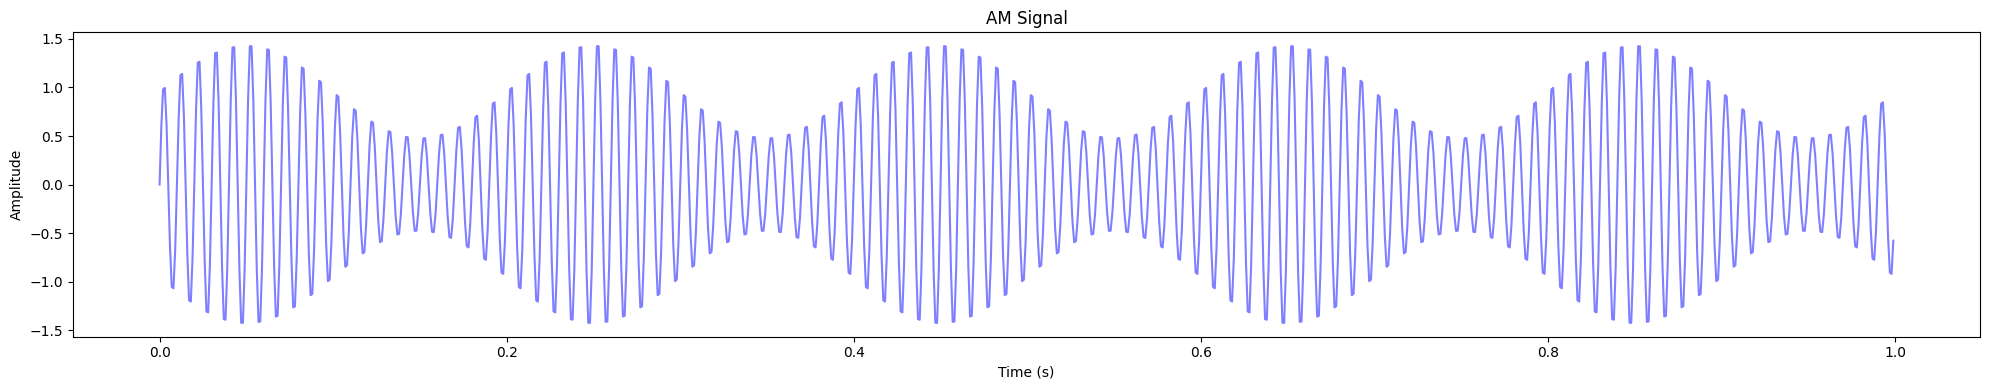

In [8]:
# Menginitialisasi parameter parameter yang digunakan untuk membuat sinyal radio AM
fs = 1000 # Sampling frequency
carrier_frequency = 100 # Carrier frequency 
modulating_frequency = 5 # Modulating frequency

t = np.linspace(0, 1, fs, endpoint=False) # Waktu dari 0 sampai 1 detik
carrier = np.sin(2 * np.pi * carrier_frequency * t) # Sinyal pembawa
modulating_signal = 1 + 0.5 * np.sin(2 * np.pi * modulating_frequency * t) # Sinyal modulasi

# Membuat sinyal AM 
am_signal = carrier * modulating_signal # Sinyal AM

# Menampilkan plot sinyal AM
plt.figure(figsize=(20, 4))
plt.plot(t, am_signal, color="blue", alpha=0.5)
plt.title("AM Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

## Sinyal Radio FM

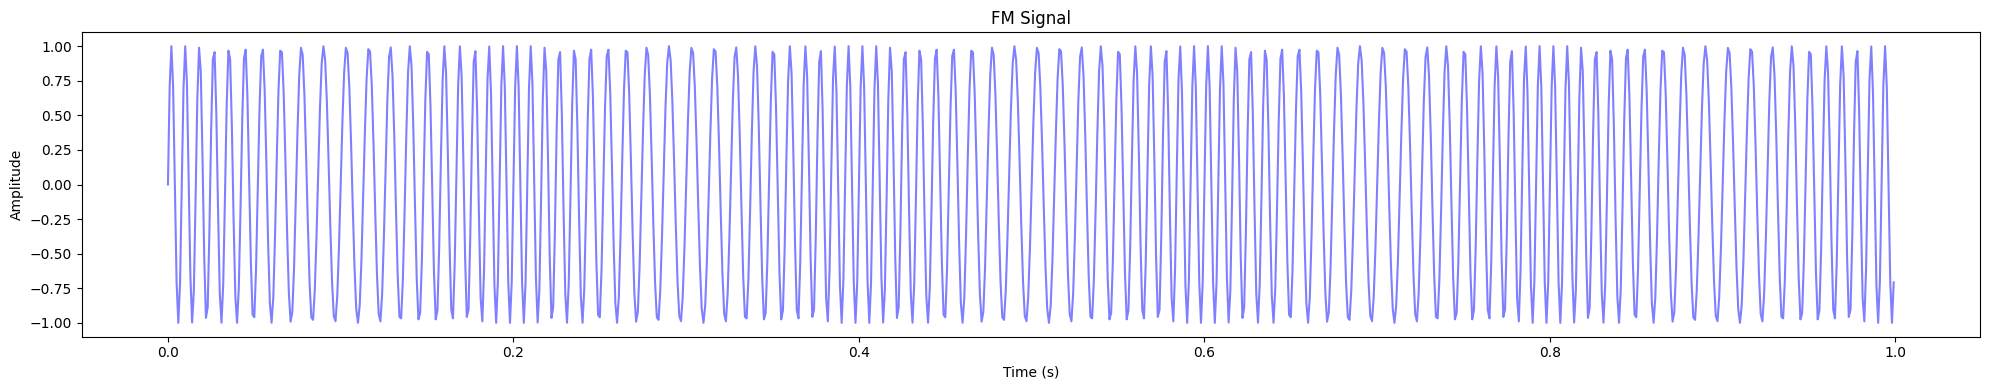

In [9]:
#Menginitialisasi parameter parameter yang digunakan untuk membuat sinyal radio FM
fs = 1000 # Sampling frequency
carrier_frequency = 100 # Carrier frequency
modulating_frequency = 5 # Modulating frequency
t = np.linspace(0, 1, fs, endpoint=False) # Waktu dari 0 sampai 1 detik

# Membuat sinyal pembawa
carrier = np.sin(2 * np.pi * carrier_frequency * t) # Sinyal pembawa
# Membuat sinyal modulasi
modulating_signal = np.sin(2 * np.pi * modulating_frequency * t) # Sinyal modulasi
# Membuat sinyal FM
fm_signal = np.sin(2 * np.pi * carrier_frequency * t + 5 * modulating_signal) # Sinyal FM

# Menampilkan plot sinyal FM
plt.figure(figsize=(20, 4))
plt.plot(t, fm_signal, color="blue", alpha=0.5)
plt.title("FM Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

## Sinyal Mekanik - Getaran Mekanik

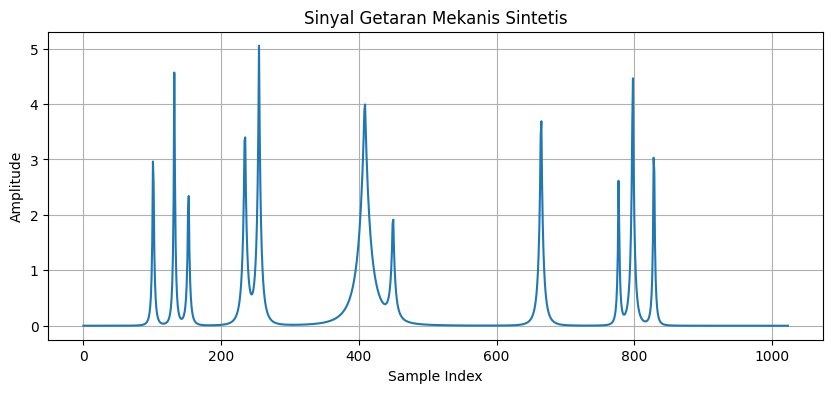

In [10]:
import pywt

vibration_signal = pywt.data.demo_signal('Bumps', n=1024)

# Plot sinyal getaran
plt.figure(figsize=(10, 4))
plt.plot(vibration_signal)
plt.title('Sinyal Getaran Mekanis Sintetis')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

<h1> Sampling Rate - Sinyal Analog to Digital </h1>

## Sampling = Kapan harus menangkap nilai

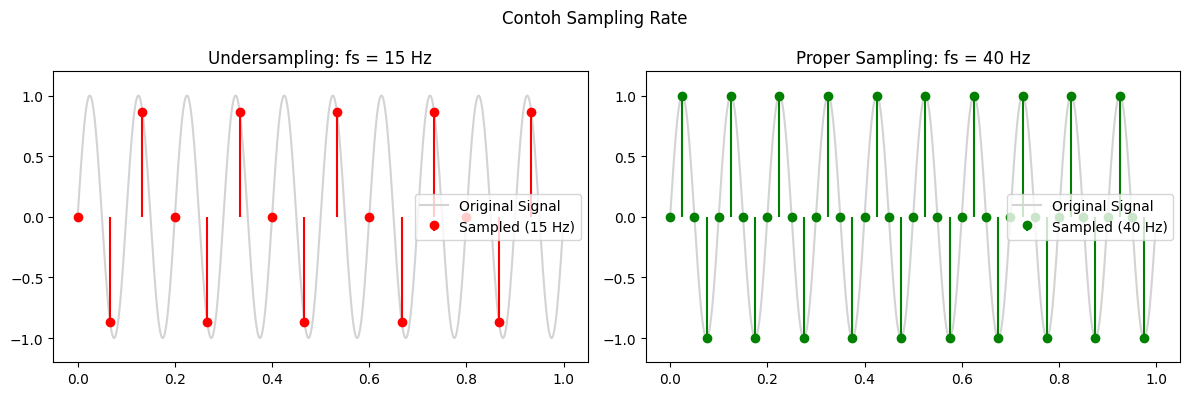

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Sinyal Utama
f_signal = 10  # Frekuensi Sinyal Utama
t_cont = np.linspace(0, 1, 1000, endpoint=False)
x_cont = np.sin(2 * np.pi * f_signal * t_cont)

# Two sampling rates: one below and one above Nyquist rate
fs_low = 15  # Below Nyquist (Nyquist = 2*10 = 20 Hz)
fs_high = 40  # Above Nyquist

def sample_signal(fs, t_max=1):
    t_sampled = np.arange(0, t_max, 1/fs)
    x_sampled = np.sin(2 * np.pi * f_signal * t_sampled)
    return t_sampled, x_sampled

t_low, x_low = sample_signal(fs_low)
t_high, x_high = sample_signal(fs_high)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Undersampling (Aliasing)
axs[0].plot(t_cont, x_cont, 'lightgray', label='Original Signal')
axs[0].stem(t_low, x_low, linefmt='r', markerfmt='ro', basefmt=" ", label='Sampled (15 Hz)')
axs[0].set_title('Undersampling: fs = 15 Hz')
axs[0].legend()
axs[0].set_ylim(-1.2, 1.2)

# Proper sampling (No aliasing)
axs[1].plot(t_cont, x_cont, 'lightgray', label='Original Signal')
axs[1].stem(t_high, x_high, linefmt='g', markerfmt='go', basefmt=" ", label='Sampled (40 Hz)')
axs[1].set_title('Proper Sampling: fs = 40 Hz')
axs[1].legend()
axs[1].set_ylim(-1.2, 1.2)

plt.suptitle("Contoh Sampling Rate")
plt.tight_layout()
plt.show()

## Teorema Sampling Nyquist–Shannon

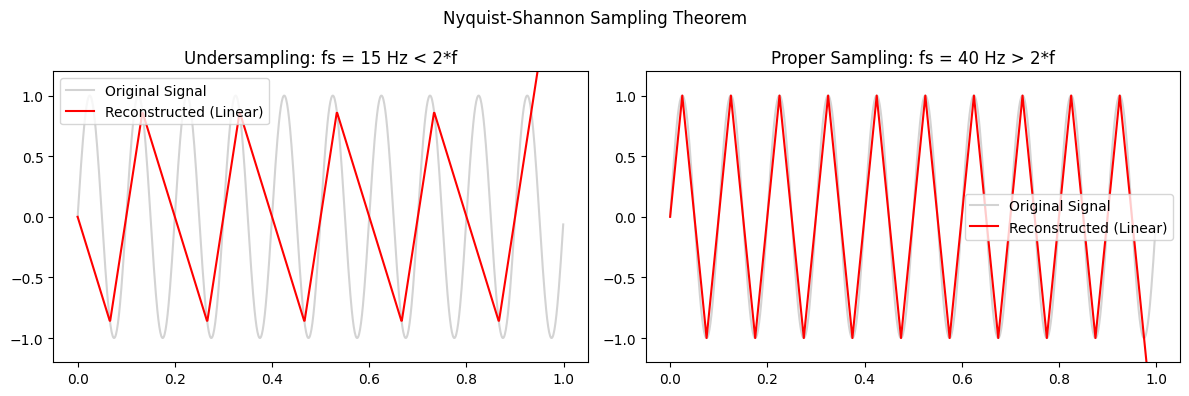

In [12]:
from scipy.interpolate import interp1d

def interpolate_sampled(t_sampled, x_sampled, t_cont):
    """
    Interpolates the sampled signal to match the continuous time vector.
    """
    x_interp = interp1d(t_sampled, x_sampled, kind='linear', fill_value="extrapolate")
    return x_interp(t_cont)

# Interpolate the sampled signals to the continuous time vector
x_low_interp = interpolate_sampled(t_low, x_low, t_cont)
x_high_interp = interpolate_sampled(t_high, x_high, t_cont)

## Plot the Undersampled and Properly Sampled Signals
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Undersampling (Aliasing)
axs[0].plot(t_cont, x_cont, 'lightgray', label='Original Signal')
axs[0].plot(t_cont, x_low_interp, 'r', label='Reconstructed (Linear)')
axs[0].set_title('Undersampling: fs = 15 Hz < 2*f')
axs[0].legend()
axs[0].set_ylim(-1.2, 1.2)

# Proper sampling (No aliasing)
axs[1].plot(t_cont, x_cont, 'lightgray', label='Original Signal')
axs[1].plot(t_cont, x_high_interp, 'r', label='Reconstructed (Linear)')
axs[1].set_title('Proper Sampling: fs = 40 Hz > 2*f')
axs[1].legend()
axs[1].set_ylim(-1.2, 1.2)

plt.suptitle("Nyquist-Shannon Sampling Theorem")
plt.tight_layout()
plt.show()

## Fourier Transform

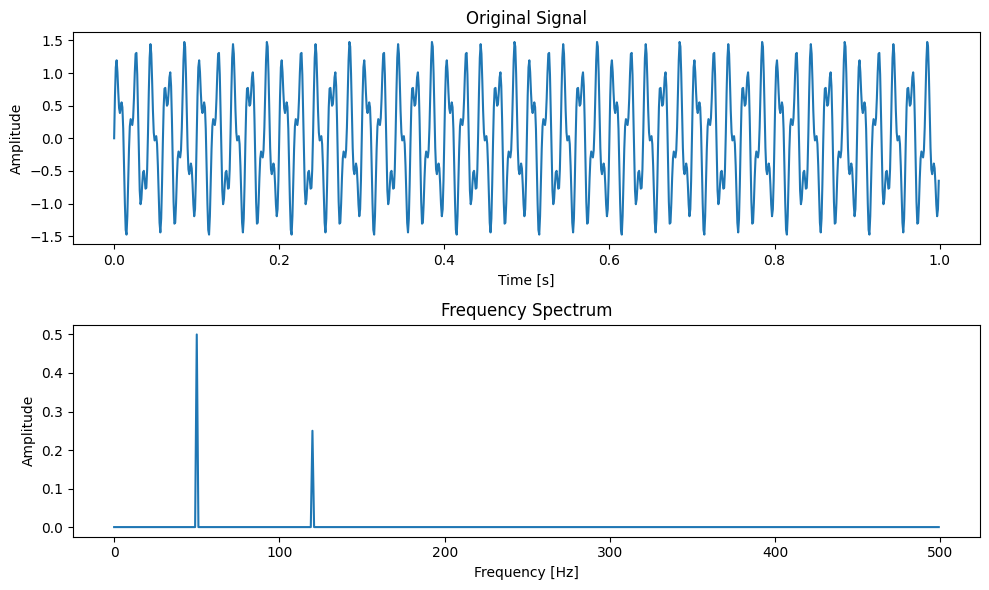

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Simulate a signal (mix of 50 Hz and 120 Hz)
fs = 1000  # original sampling rate
T = 1.0    # duration in seconds
t = np.linspace(0.0, T, int(fs * T), endpoint=False)

## Gabungan dari dua sinyal
x = np.sin(2.0*np.pi*50.0*t) + 0.5*np.sin(2.0*np.pi*120.0*t)

# FFT
N = len(x)
xf = fftfreq(N, 1 / fs)
yf = np.abs(fft(x)) / N  # Normalize

## Plot Signal
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

axs[0].plot(t, x)
axs[0].set_title("Original Signal")
axs[0].set_xlabel("Time [s]")
axs[0].set_ylabel("Amplitude")

axs[1].plot(xf[:N//2], yf[:N//2])
axs[1].set_title("Frequency Spectrum")
axs[1].set_xlabel("Frequency [Hz]")
axs[1].set_ylabel("Amplitude")

fig.tight_layout()
plt.show()

## Resampling, Downsampling, Upsampling

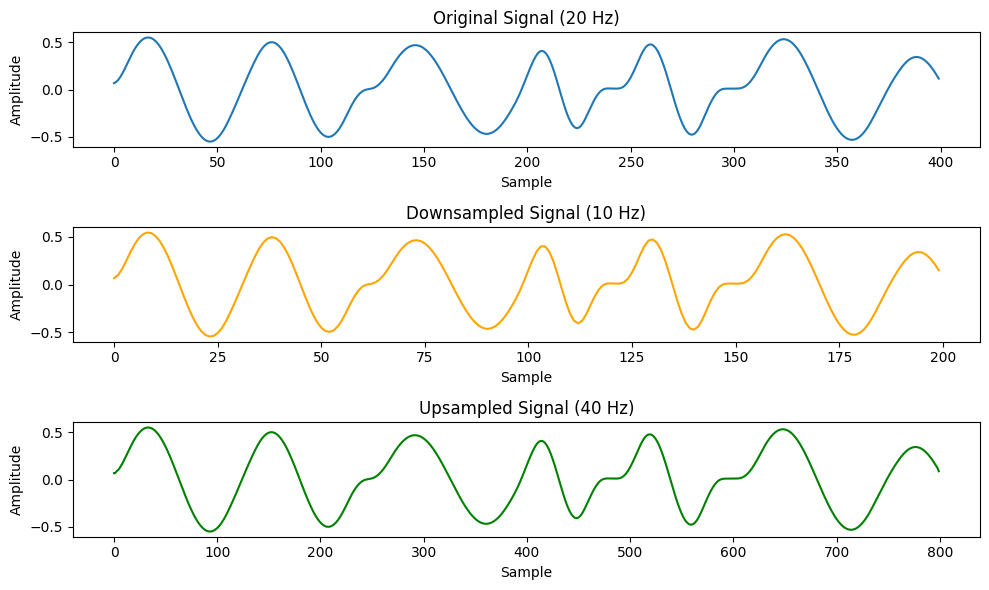

In [14]:
from scipy.signal import decimate, resample
import neurokit2 as nk

# Sinyal asli
fs = 20 ## Sampling rate 20 Hz
time = 20 ## 20 detik
resp_signal = nk.rsp_simulate(duration=time, sampling_rate=fs, respiratory_rate=20, noise=0.01, random_state=2024)

# Upsampling
resp_upsampling = resample(resp_signal, 2*len(resp_signal))  # 20 Hz → 40 Hz (dua kali lipat)

# Downsampling
resp_downsampling = decimate(resp_signal, 2)  # 20 Hz → 10 Hz

## Plot original and downsampled signals
fig, axs = plt.subplots(3, 1, figsize=(10, 6))

axs[0].plot(resp_signal, label='Original Signal')
axs[0].set_title("Original Signal (20 Hz)")
axs[0].set_xlabel("Sample")
axs[0].set_ylabel("Amplitude")

axs[1].plot(resp_downsampling, label='Downsampled Signal (10 Hz)', color='orange')
axs[1].set_title("Downsampled Signal (10 Hz)")
axs[1].set_xlabel("Sample")
axs[1].set_ylabel("Amplitude")

axs[2].plot(resp_upsampling, label='Upsampled Signal (40 Hz)', color='green')
axs[2].set_title("Upsampled Signal (40 Hz)")
axs[2].set_xlabel("Sample")
axs[2].set_ylabel("Amplitude")

plt.tight_layout()
plt.show()

## Filtering

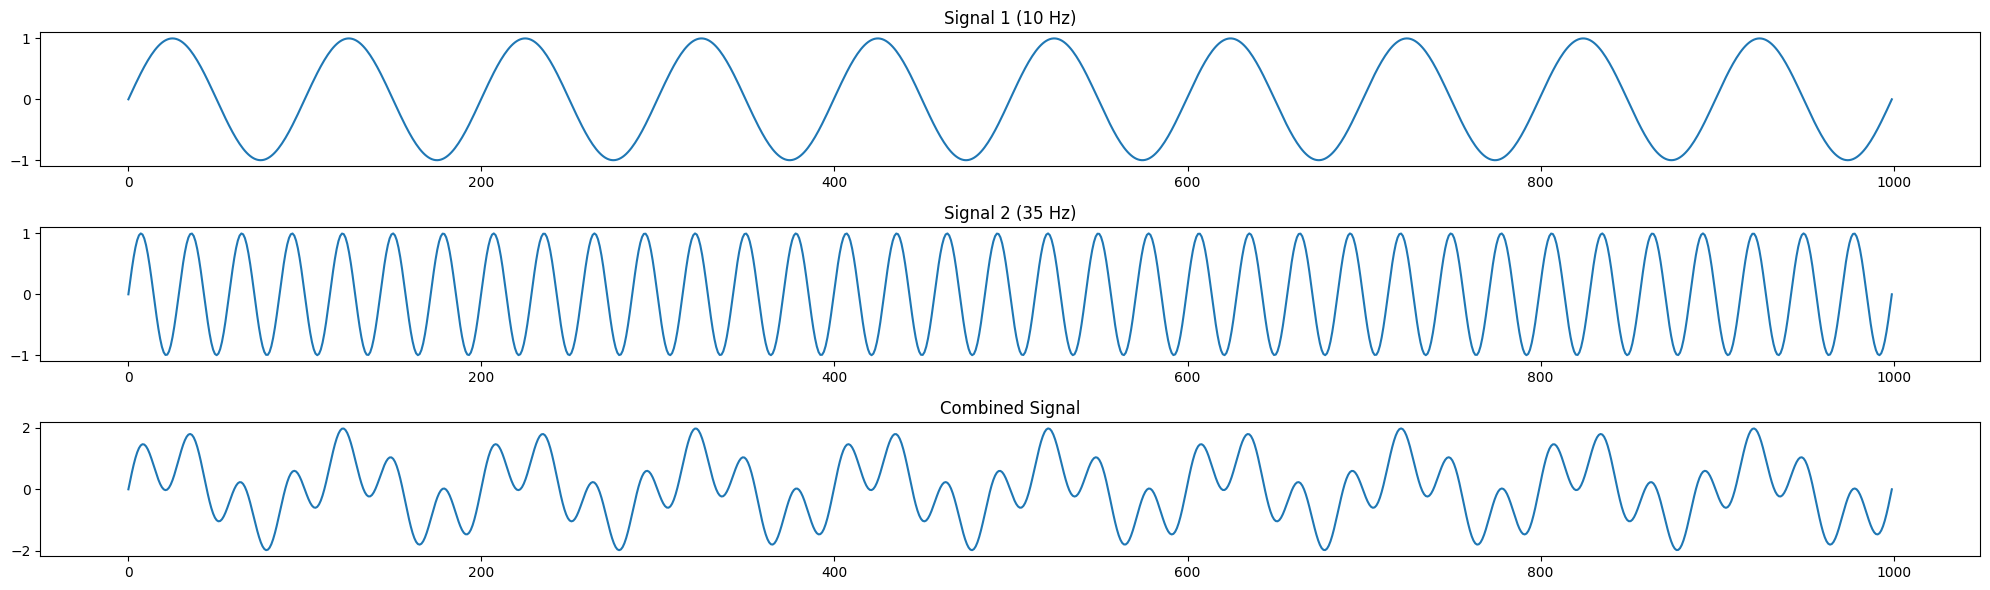

In [15]:
fs = 1000
time_axis = np.linspace(0, 1, fs)

signal_1 = np.sin(2 * np.pi * 10 * time_axis)
signal_2 = np.sin(2 * np.pi * 35 * time_axis)
signal_combine = signal_1 + signal_2

fig, ax = plt.subplots(3, 1, figsize=(20, 6))
ax[0].plot(signal_1)
ax[0].set_title("Signal 1 (10 Hz)")
ax[1].plot(signal_2)
ax[1].set_title("Signal 2 (35 Hz)")
ax[2].plot(signal_combine)
ax[2].set_title("Combined Signal")
plt.tight_layout()
plt.show()

## Mendesain Filter

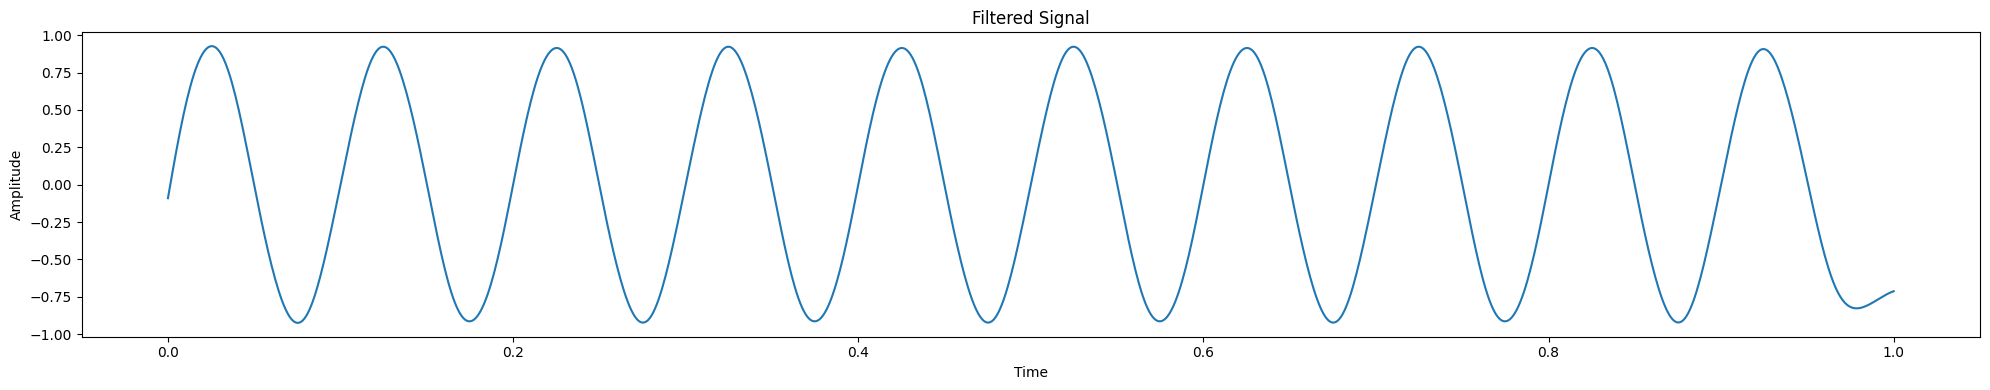

In [16]:
from scipy import signal

cutoff = 15 # Frekuensi cutoff dalam Hz
order = 3 # Orde filter

b, a = signal.butter(order, cutoff, fs=fs, btype='low', analog=False)

signal_filtered = signal.filtfilt(b, a, signal_combine)

plt.figure(figsize=(20, 4))
plt.plot(time_axis, signal_filtered)
plt.title("Filtered Signal")
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.tight_layout()
plt.show()

<h1> Membuang 2 buah sinyal </h1>

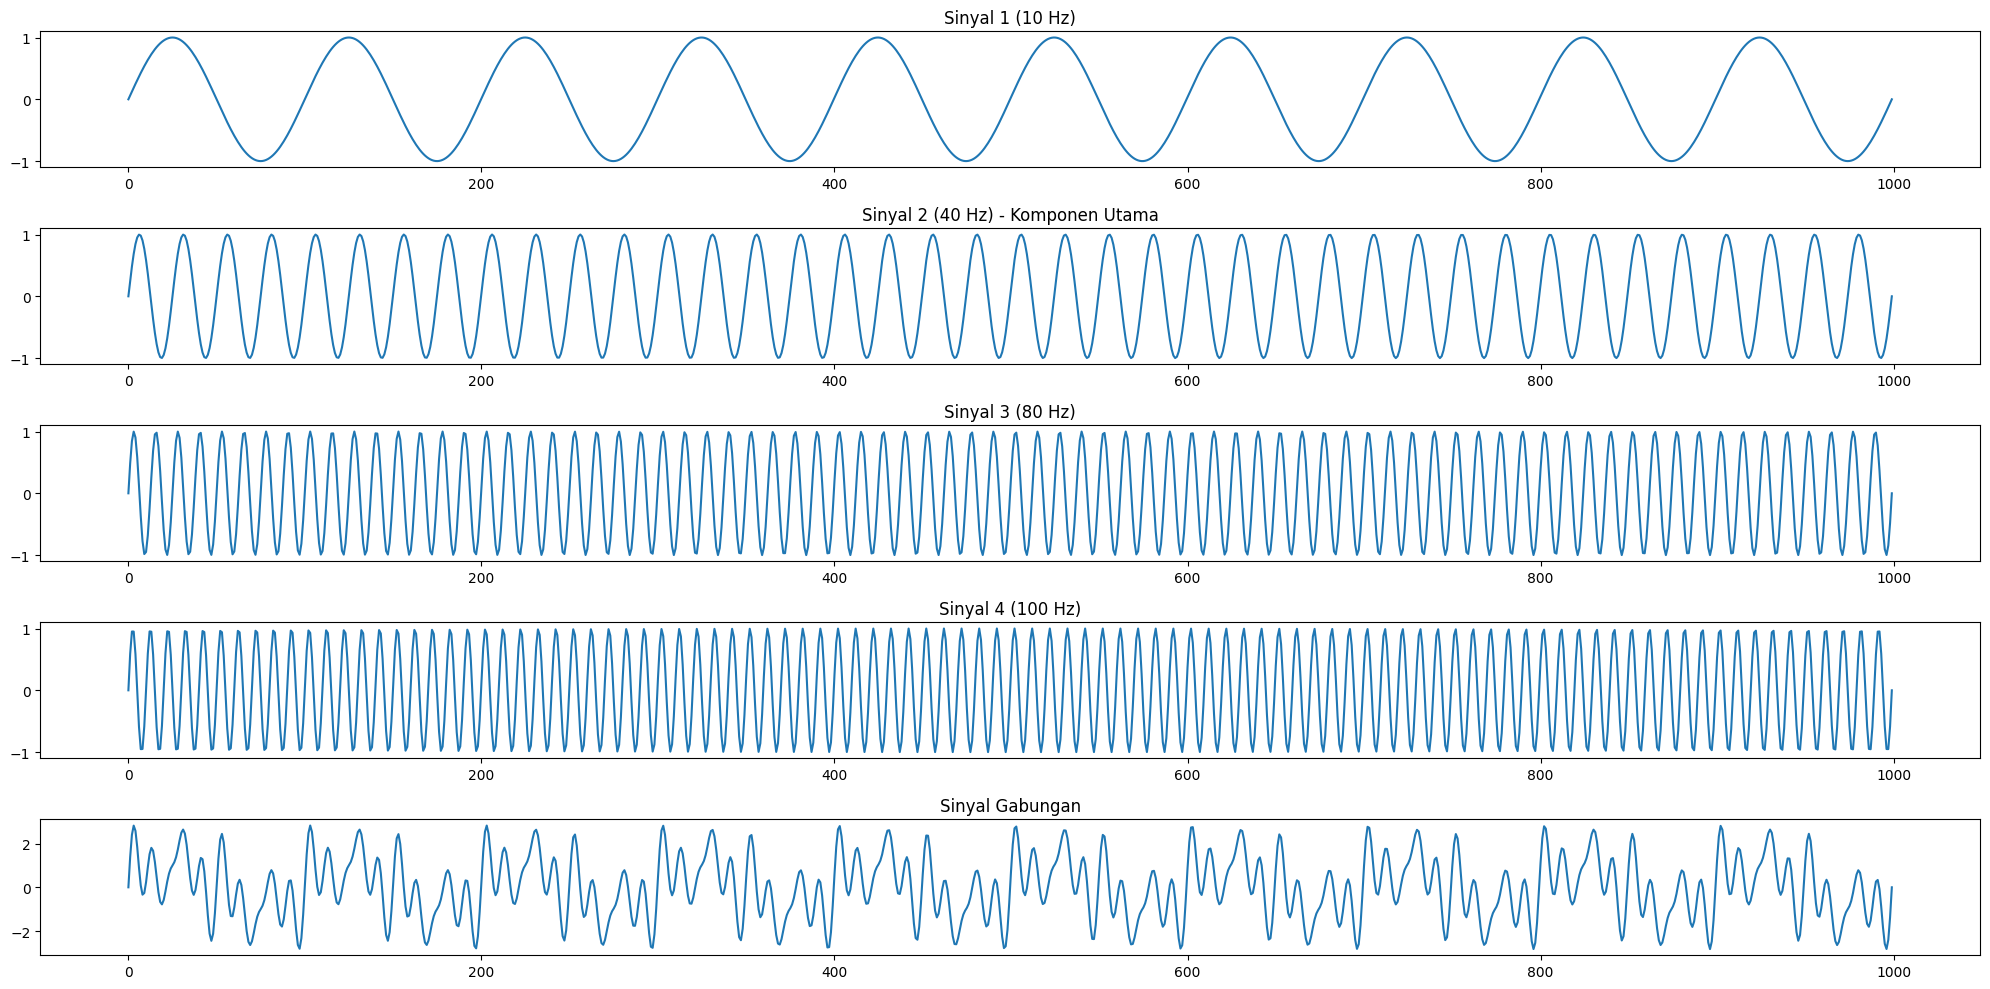

In [17]:
fs = 1000
time_axis = np.linspace(0, 1, fs)

sinyal_1 = np.sin(2 * np.pi * 10 * time_axis) # 10 Hz
sinyal_2 = np.sin(2 * np.pi * 40 * time_axis) # 40 Hz
sinyal_3 = np.sin(2 * np.pi * 80 * time_axis) # 80 Hz
sinyal_4 = np.sin(2 * np.pi * 100 * time_axis) # 100 Hz
sinyal_gabungan = sinyal_1 + sinyal_2 + sinyal_3 + sinyal_4

fig, ax = plt.subplots(5, 1, figsize=(20, 10))
ax[0].plot(sinyal_1)
ax[0].set_title("Sinyal 1 (10 Hz)")
ax[1].plot(sinyal_2)
ax[1].set_title("Sinyal 2 (40 Hz) - Komponen Utama")
ax[2].plot(sinyal_3)
ax[2].set_title("Sinyal 3 (80 Hz)")
ax[3].plot(sinyal_4)
ax[3].set_title("Sinyal 4 (100 Hz)")
ax[4].plot(sinyal_gabungan)
ax[4].set_title("Sinyal Gabungan")
plt.tight_layout()
plt.show()

## Melakukan Bandpass (Menghilangkan frekuensi rendah dan tinggi)

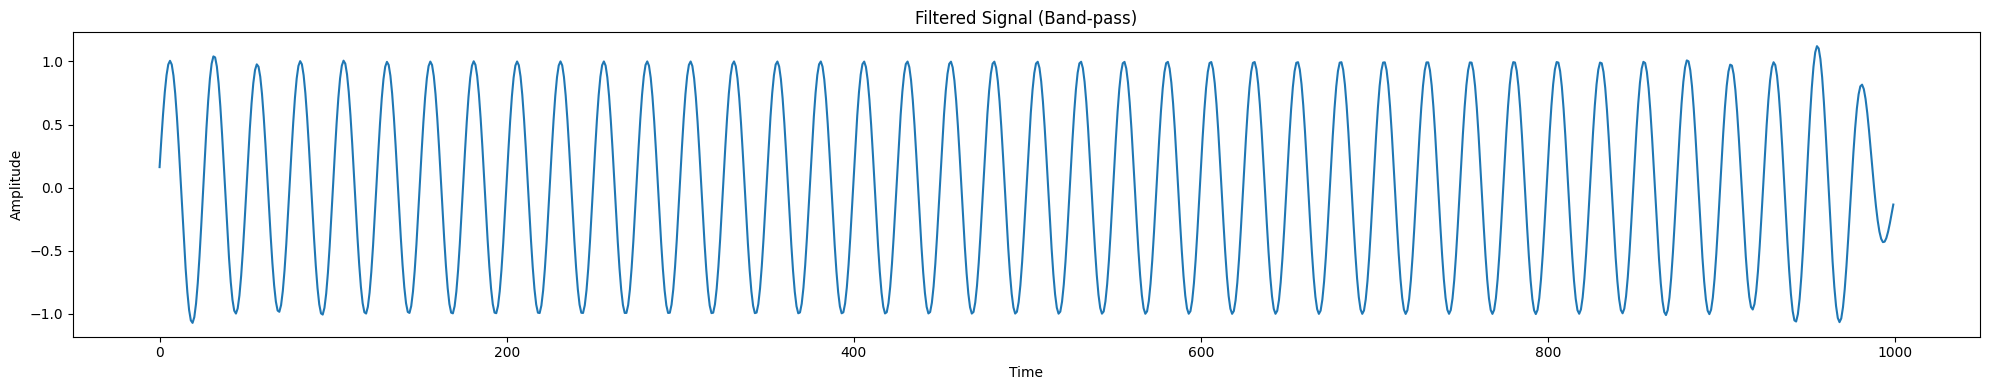

In [18]:
cutoff_low = 27 # Frekuensi cutoff dalam Hz
cutoff_high = 50 # Frekuensi cutoff dalam Hz
order = 3 # Orde filter

b, a = signal.butter(order, [cutoff_low, cutoff_high], fs=fs, btype='band', analog=False)
signal_filt_band = signal.filtfilt(b, a, sinyal_gabungan)

plt.figure(figsize=(20, 4))
plt.plot(signal_filt_band)
plt.title("Filtered Signal (Band-pass)")
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.tight_layout()
plt.show()